# Histogram Matching

In [ ]:
%matplotlib inline
from skimage.exposure import cumulative_distribution
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np

In [4]:
def hist_matching(c,c_t,im):
    b = np.interp(c,c_t,np.arange(256))
    pix_repl = {i:b[i] for i in range(256)}
    mp = np.arange(0,256)
    for (k,v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im,s)
    return im

def cdf(im):
    c, b = cumulative_distribution(im)
    for i in range(b[0]):
        c = np.insert(c, 0 , 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c,1)
    return c

In [16]:
im = imread('images/jaguar.png').astype(np.uint8)
im_t = imread('images/leaves.png')
print(np.max(im), np.max(im_t))

255 255


In [17]:
im1 =np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c,c_t,im[...,i])

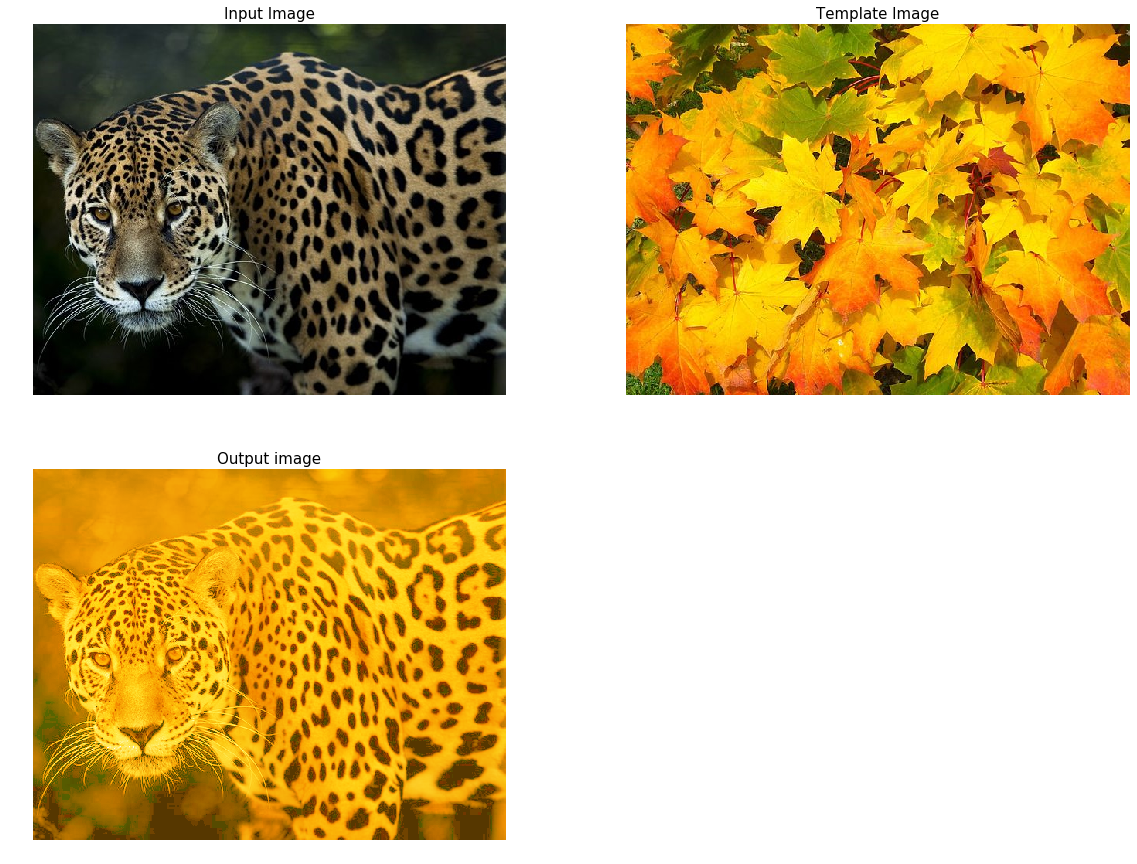

In [37]:
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=15)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=15)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output image', size=15)
plt.show()    